# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [23]:
model=Sequential()

#第一層
model.add(Dense(units=266,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))
#第二層
model.add(Dense(units=50, 
                kernel_initializer='normal', 
                activation='relu'))

#第三層
model.add(Dense(units=10,
                kernel_initializer='normal',
              activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 266)               208810    
_________________________________________________________________
dense_14 (Dense)             (None, 50)                13350     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                510       
Total params: 222,670
Trainable params: 222,670
Non-trainable params: 0
_________________________________________________________________


# 訓練模型

In [24]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [25]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 16s 337us/step - loss: 0.2896 - acc: 0.9183 - val_loss: 0.1473 - val_acc: 0.9563
Epoch 2/10
48000/48000 [==============================] - 10s 216us/step - loss: 0.1117 - acc: 0.9659 - val_loss: 0.1131 - val_acc: 0.9660
Epoch 3/10
48000/48000 [==============================] - 13s 269us/step - loss: 0.0723 - acc: 0.9776 - val_loss: 0.0924 - val_acc: 0.9722
Epoch 4/10
48000/48000 [==============================] - 13s 264us/step - loss: 0.0518 - acc: 0.9834 - val_loss: 0.0982 - val_acc: 0.9711
Epoch 5/10
48000/48000 [==============================] - 12s 258us/step - loss: 0.0398 - acc: 0.9871 - val_loss: 0.0962 - val_acc: 0.9736
Epoch 6/10
48000/48000 [==============================] - 12s 260us/step - loss: 0.0300 - acc: 0.9902 - val_loss: 0.0860 - val_acc: 0.9765
Epoch 7/10
48000/48000 [==============================] - 12s 257us/step - loss: 0.0244 - acc: 0.9917 - val_loss: 0.

# 以圖形顯示訓練過程

In [16]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

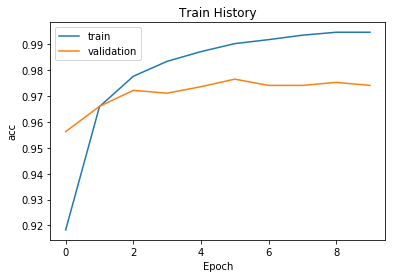

In [26]:
show_train_history(train_history,'acc','val_acc')

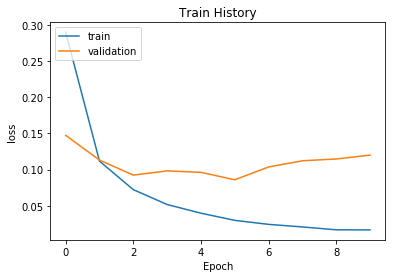

In [27]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [28]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 58us/step

accuracy= 0.9739
